{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

* Define Canopy Height Model (CHM), Digital Elevation Model (DEM) and Digital Surface Model (DSM).
* Describe the key differences between the **CHM**, **DEM**, **DSM**.

</div>

As you learned in the previous lesson, LiDAR or **Li**ght **D**etection **a**nd **R**anging is an active remote sensing system that can be used to measure vegetation height across wide areas. 

If the data are discrete return, Lidar point clouds are most commonly derived data product from a lidar system. However, often people work with lidar data in raster format given it's smaller in size and
thus easier to work with. In this lesson, you will import and work with 3 of the most common lidar derived data products in **Python**:

1. **Digital Terrain Model (or DTM):** ground elevation.
2. **Digital Surface Model (or DSM):** top of the surface (imagine draping a sheet over the canopy of a forest
3. **Canopy Height Model (CHM):** the height or residual distance between the ground and the top of the of objects above the ground. This includes the actual heights of trees, builds and any other objects on the earth's surface. This CHM is created by subtracting the DTM from the DSM.

## Three Important Lidar Data Products: CHM, DEM, DSM

<figure>
   <a href="{{ site.url }}/images/earth-analytics/lidar-raster-data/lidarTree-height.png">
   <img src="{{ site.url }}/images/earth-analytics/lidar-raster-data/lidarTree-height.png" alt="Lidar derived DSM, DTM and CHM."></a>
   <figcaption>Digital Surface Model (DSM), Digital Elevation Models (DEM) and
   the Canopy Height Model (CHM) are the most common raster format lidar
   derived data products. One way to derive a CHM is to take
   the difference between the digital surface model (DSM, tops of trees, buildings
   and other objects) and the Digital Terrain Model (DTM, ground level). The CHM
   represents the actual height of trees, buildings, etc. with the influence of
   ground elevation removed. Graphic: Colin Williams, NEON
   </figcaption>
</figure>


### Digital Elevation Model

In the previous lesson, you opened and explored a digital elevation model (DEM). The DEM, also known as a digital terrain model (DTM) represents the elevation of the earth's surface. The DEM represents the ground - and thus DOES NOT INCLUDE trees and buildings and other objects.

In this lesson, you will explore Digital Surface Models (DSM) and learn how to use the DEM and the DSM to create a canopy height model (CHM). 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable
import rasterio as rio
import earthpy as et
import earthpy.plot as ep

# Import data from EarthPy
data = et.data.get_data('colorado-flood', verbose = False)

# Set up home directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

import warnings
warnings.filterwarnings("ignore")

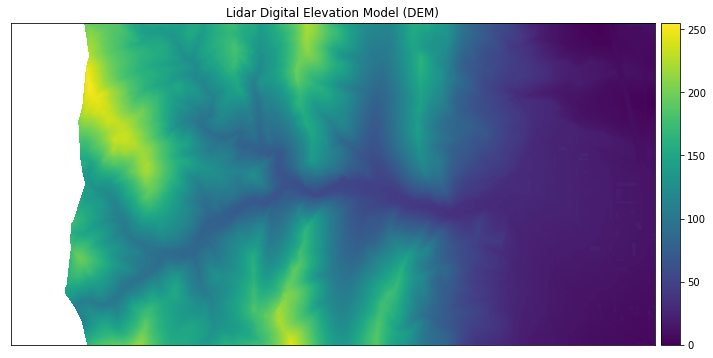

In [2]:
# open raster data
lidar_dem = rio.open(
    'data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')
lidar_dem_im = lidar_dem.read(masked=True)

ep.plot_bands(lidar_dem_im[0], cmap='viridis',
              title='Lidar Digital Elevation Model (DEM)')
plt.show()

### Import digital surface model (DSM)

Next, let's review the digital surface model (DSM). The DSM represents the top of the earth's surface. Thus, it INCLUDES TREES, BUILDINGS and other objects that sit on the earth.

In [3]:
lidar_dsm = rio.open(
    'data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif')
lidar_dsm
lidar_dsm_im = lidar_dsm.read(masked=True)
#lidar_dsm_im[lidar_dsm_im == lidar_dsm.nodata] = np.nan

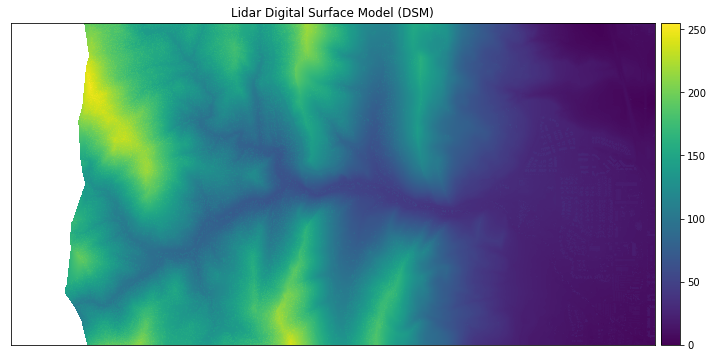

In [4]:
ep.plot_bands(lidar_dsm_im[0], cmap='viridis',
              title='Lidar Digital Surface Model (DSM)')
plt.show()

### Canopy Height Model

The canopy height model (CHM) represents the HEIGHT of the trees. This is not an elevation value, rather it's the height or distance between the ground and the top of the trees (or buildings or whatever object that the lidar system detected and recorded). 

Some canopy height models also include buildings, so you need to look closely at your data to make sure it was properly cleaned before assuming it represents all trees!

#### Calculate difference between two rasters

There are different ways to calculate a CHM. One easy way is to subtract the DEM from the DSM.

DSM - DEM = CHM

You can learn how to subtract rasters in the <a href="{{ site.url }}/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/subtract-rasters-in-python/"> Use Data for Earth and Environmental Science in Open Source Python textbook.</a>

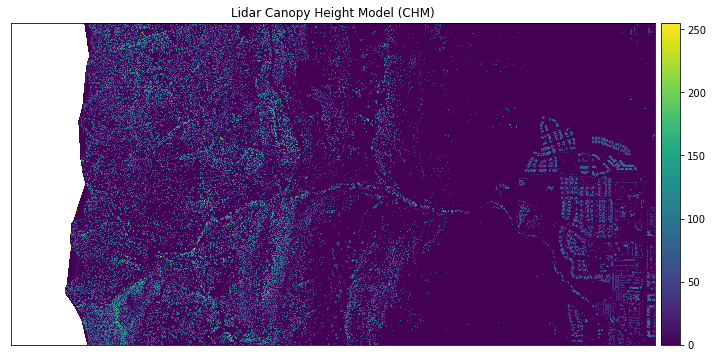

In [5]:
lidar_chm = lidar_dsm_im - lidar_dem_im

ep.plot_bands(lidar_chm[0], cmap='viridis',
              title='Lidar Canopy Height Model (CHM)')
plt.show()